# SVM

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\datasets\\cell.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(699, 11)

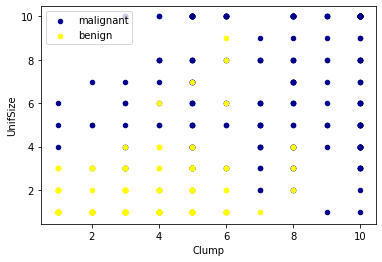

In [4]:
ax = df[df['Class']==4][0:600].plot(kind='scatter',x='Clump',y='UnifSize',color='DarkBlue',label='malignant')
df[df['Class']==2][0:600].plot(kind='scatter',x='Clump',y = 'UnifSize',color = 'Yellow',label='benign',ax=ax)

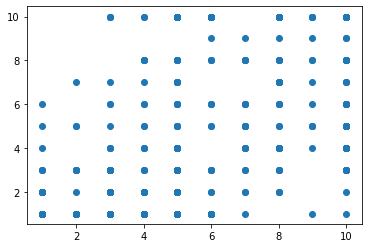

In [5]:
plt.scatter(x=df.Clump,y=df.UnifSize)
#plt.xlabel('clump',color='green')
#plt.ylabel('unisize',color='red')
plt.show()

In [6]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [12]:
df = df[pd.to_numeric(df['BareNuc'], errors="coerce").notnull()]    
df['BareNuc'] = df['BareNuc']
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [13]:
df.shape

(683, 11)

In [14]:
x = df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']].values

In [15]:
y = df['Class'].values
#y

In [16]:
from sklearn.model_selection import train_test_split


xtrain ,xtest,ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state = 4)
print(f"train set: {xtrain.shape}  and {ytrain.shape}")
print(f"test set: {xtest.shape}  and {ytest.shape}")

train set: (546, 9)  and (546,)
test set: (137, 9)  and (137,)


In [17]:
from sklearn import svm
clf  = svm.SVC(kernel='rbf')
clf.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
ytrain.shape

(546,)

In [19]:
yhat= clf.predict(xtest)

In [20]:
yhat

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(ytest,yhat)

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [22]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



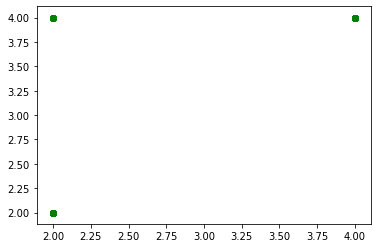

In [29]:
plt.scatter(ytest,yhat,c='g')